In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
if None != os.getenv('NERSC_HOST'):
    import matplotlib.font_manager as font_manager
    font_manager.fontManager.addfont('/global/cfs/cdirs/lz/physics/WS/SR1/msttcorefonts/Times_New_Roman.ttf')

import matplotlib as mpl
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.style.use('/global/cfs/cdirs/lz/users/haselsco/sr3/LZStyle/SetLZStyle.mplstyle')

from multihist import Hist1d

from scipy.interpolate import interp1d


%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [2]:
def extrapolate(data, mass=1e6):
    m0, s0 = data[-1]
    return np.concatenate([data,[[mass, s0*mass/m0]]], axis=0)

def minbound(curves, masses=None):
    if masses is None:
        masses = np.logspace(-3, 4, 200)
    result = np.array([np.nan]*len(masses))
    for curve in curves:
        if curve[-1][0] < masses[-1]:
            curve = extrapolate(curve, masses[-1])
        yinterp = 10**(interp1d(*(np.log10(curve).T), bounds_error=False)(np.log10(masses)))
        #yinterp = interp1d(*(curve.T), bounds_error=False)(masses)
        result = np.nanmin([result, yinterp], axis=0)
    return np.array([masses, result]).T

def load_and_plot_existing(ax, leg=True, lw=1, leg_params=None, ER_model='massive'):
    
    curves_dir = 'ExistingLimits/'
    
    if ER_model == 'massive':

        m_lim, x_lim = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massive.txt').transpose()
        l1, = ax.plot(m_lim, x_lim, '--', color='#CFC0E5', lw=lw, label='DAMIC-M')
        
        m_lim, x_lim = np.loadtxt(curves_dir + 'Darkside50_ER_Massive.txt').transpose()
        l2, = ax.plot(m_lim, x_lim, '--', color='#CE977A', lw=lw, label='Darkside-50')

        m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massive.txt').transpose()
        l3, = ax.plot(m_lim, x_lim, '--', color='#a4dbed', lw=lw, label='SENSEI SNOLAB')
        
        m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_S2Only_ER_Massive.txt').transpose()
        l4, = ax.plot(m_lim, x_lim, '--', color='#CA778C', lw=lw, label='XENON1T S2only')

        #m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_S2Only_Solar_Reflected_ER_Massive.txt').transpose()
        #ax.plot(m_lim, x_lim, '--', lw=1.5, label='XENON1T S2only (Solar Refl.)')
        #m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_Solar_Reflection_ER_Massive.txt').transpose()
        #ax.plot(m_lim, x_lim, '--', lw=1.5, label='SENSEI SNOLAB (Solar Refl.)')

        #l5, = ax.plot(m_lim, x_lim, '--', color='#C3B02F', lw=lw, label='nu-cleus 2017')
        #l5, = ax.plot(m_lim, x_lim, '--', color='darkgrey', lw=lw, label='PandaX-4T Migdal 2023') #color='#C3B02F'
        #l6, = ax.plot(m_lim, x_lim, '--', color='#56872C', lw=lw, label='XENON1T S2-Only 2019')
        #l7, = ax.plot(m_lim, x_lim, '--', color='#D7ADB7', lw=lw, label='EDELWEISS Migdal 2019')
        #l8, = ax.plot(m_lim, x_lim, '--', color='#bcced4', lw=lw, label='LZ 2022')
        #l9, = ax.plot(m_lim, x_lim, '--', color='#a4bd8e', lw=lw, label='DarkSide-50 2023')
    
        if leg:
            leg1 = ax.legend(handles=[l1, l2, l3, l4], **leg_params)
            ax.add_artist(leg1)

    elif ER_model == 'massless':
        
        m_lim, x_lim = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massless.txt').transpose()
        l1, = ax.plot(m_lim, x_lim, '--', color='#CFC0E5', lw=lw, label='DAMIC-M')

        m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_MINOS_ER_Massless.txt').transpose()
        l2, = ax.plot(m_lim, x_lim, '--', color='#CE977A', lw=lw, label='SENSEI MINOS')

        m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massless.txt').transpose()
        l3, = ax.plot(m_lim, x_lim, '--', color='#a4dbed', lw=lw, label='SENSEI SNOLAB')

        #m_lim, x_lim = np.loadtxt(curves_dir + 'protoSENSEI_MINOS_ER_Massless.txt').transpose()
        #l4, = ax.plot(m_lim, x_lim, '--', color='#CA778C', lw=lw, label='protoSENSEI')

        m_lim, x_lim = np.loadtxt(curves_dir + 'Freeze_in_ER_Massless.txt').transpose()
        l4, = ax.plot(m_lim, x_lim, '-', color='#FF9039', lw=lw*2, label='Freeze-in')

        #m_lim, x_lim = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_Solar_Reflection_ER_Massless.txt').transpose()
        #ax.plot(m_lim, x_lim, '--', lw=1.5, label='SENSEI SNOLAB (Solar Refl.)')
        #m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_S2Only_Solar_Reflected_ER_Massless.txt').transpose()
        #ax.plot(m_lim, x_lim, '--', lw=1.5, label='XENON1T S2 Only (Solar Refl.)')

        if leg:
            leg1 = ax.legend(handles=[l1, l2, l3, l4], **leg_params)
            ax.add_artist(leg1)


In [3]:
def plotexcludedmassive(ax, details=False, **kwargs):
    
    curves_dir = 'ExistingLimits/'
    
    damic = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massive.txt')
    ds50 = np.loadtxt(curves_dir + 'Darkside50_ER_Massive.txt')
    sensei_snolab = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massive.txt')
    x1t_s2o = np.loadtxt(curves_dir + 'XENON1T_S2Only_ER_Massive.txt')

    data = minbound([damic, ds50, sensei_snolab, x1t_s2o], masses=None)#data.T[0])
    kwargs.setdefault('edgecolor', None)
    kwargs.setdefault('facecolor','#000000')
    kwargs.setdefault('alpha',0.05)
    #data = extrapolate(data, 1e5)
    ax.fill_between(*(data.T), ax.get_ylim()[1], **kwargs)
    if details:
        load_and_plot_existing(ax,leg=False,lw=1,ER_model='massive')

        
def plotexcludedmassless(ax, details=False, **kwargs):
    
    curves_dir = 'ExistingLimits/'
    
    damic = np.loadtxt(curves_dir + 'DAMIC_M_ER_Massless.txt')
    sensei_minos = np.loadtxt(curves_dir + 'SENSEI_MINOS_ER_Massless.txt')
    sensei_snolab = np.loadtxt(curves_dir + 'SENSEI_SNOLAB_ER_Massless.txt')
    proto_sensei = np.loadtxt(curves_dir + 'protoSENSEI_MINOS_ER_Massless.txt')
    freeze_in = np.loadtxt(curves_dir + 'Freeze_in_ER_Massless.txt')

    data = minbound([damic, sensei_minos, sensei_snolab, proto_sensei], masses=None)#data.T[0])
    kwargs.setdefault('edgecolor', None)
    kwargs.setdefault('facecolor','#000000')
    kwargs.setdefault('alpha',0.05)
    #data = extrapolate(data, 1e5)
    ax.fill_between(*(data.T), ax.get_ylim()[1], **kwargs)
    if details:
        load_and_plot_existing(ax,leg=False,lw=1,ER_model='massless')

/tmp/ipykernel_1167612/1832352967.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


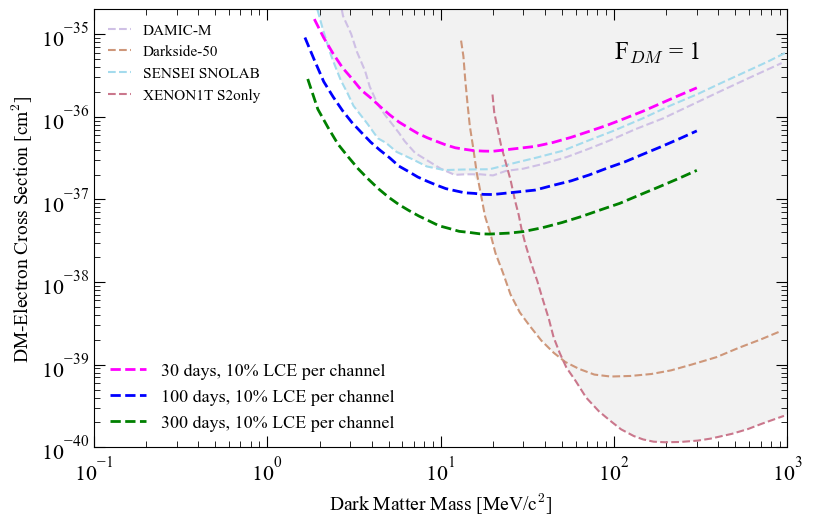

In [31]:
colors = ['blue','green','darkorange']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(9.5,6))

plotexcludedmassive(ax, details=False)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper left',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='massive')

#ax.text(1.3e-2,1.5e-40,'HeRALD - {:0.1f} g \n2x2 device array \n {:0.0f} livedays'.format(mass_det*1e3,times[i]),fontsize=15)
#ax.text(1.25e0,2e-37,'SPICE\n5.3 g GaAs', fontsize=15)

leg_hands = []

#m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_030days_2fold_lce10/HeRALD_FC_30d_2device_2fold_100mus.txt', unpack=True)
#lh, = plt.plot(m_limit*1e3, x_limit, color='magenta', ls='-', lw=2, label='30 d, Light coincident in 1 sensor')
#leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_030days_3fold_lce10/HeRALD_FC_30d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='magenta', ls='--', lw=2, label='30 days, 10% LCE per channel')
leg_hands.append(lh)

#m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_100days_2fold_lce10/HeRALD_FC_100d_2device_2fold_100mus.txt', unpack=True)
#lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='-', lw=2, label='100 d, Light coincident in 1 sensor')
#leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_100days_3fold_lce10/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='--', lw=2, label='100 days, 10% LCE per channel')
leg_hands.append(lh)

#m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_300days_2fold_lce10/HeRALD_FC_300d_2device_2fold_100mus.txt', unpack=True)
#lh, = plt.plot(m_limit*1e3, x_limit, color='green', ls='-', lw=2, label='300 d, Light coincident in 1 sensor')
#leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_300days_3fold_lce10/HeRALD_FC_300d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='green', ls='--', lw=2, label='300 days, 10% LCE per channel')
leg_hands.append(lh)

ax.text(1e2, 5e-36, r'F$_{DM}$ = 1', fontsize=18)

#x = 6.5e-2
#    if n<4:
#        y = sigs[0]
#    else: 
#        y = sigs[0]*0.75
#    ax.text(x,y,lab,fontsize=14,color=colors[j],alpha=0.95)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-40, 2e-35)
ax.set_xlim(1e-1, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

/tmp/ipykernel_1167612/1832352967.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


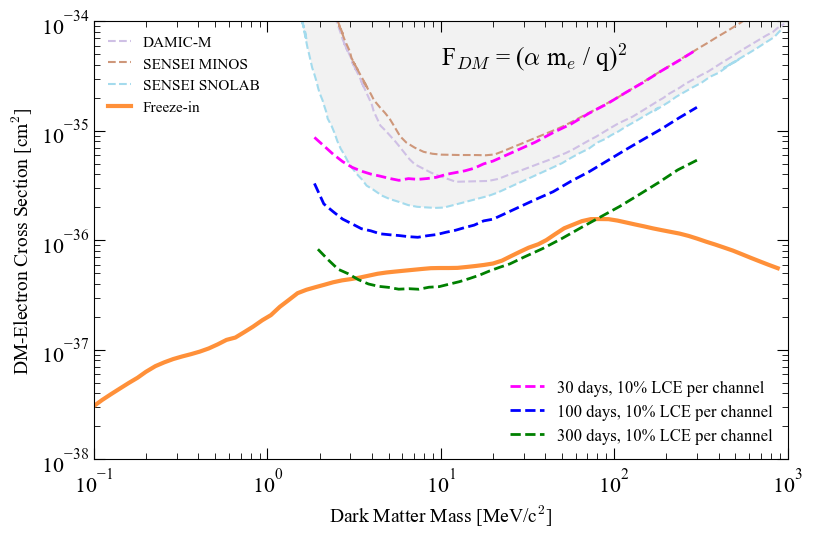

In [36]:
colors = ['blue','green','darkorange']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(9.5,6))

plotexcludedmassless(ax, details=False)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper left',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='massless')

#ax.text(1.3e-2,1.5e-40,'HeRALD - {:0.1f} g \n2x2 device array \n {:0.0f} livedays'.format(mass_det*1e3,times[i]),fontsize=15)
#ax.text(1.25e0,2e-37,'SPICE\n5.3 g GaAs', fontsize=15)

leg_hands = []

#m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_030days_2fold_lce10/HeRALD_FC_30d_2device_2fold_100mus.txt', unpack=True)
##lh, = plt.plot(m_limit*1e3, x_limit, color='magenta', ls='-', lw=2, label='30 d, Light coincident in 1 sensor')
#leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_030days_3fold_lce10/HeRALD_FC_30d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='magenta', ls='--', lw=2, label='30 days, 10% LCE per channel')
leg_hands.append(lh)

#m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_100days_2fold_lce10/HeRALD_FC_100d_2device_2fold_100mus.txt', unpack=True)
#lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='-', lw=2, label='100 d, Light coincident in 1 sensor')
#leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_100days_3fold_lce10/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='--', lw=2, label='100 days, 10% LCE per channel')
leg_hands.append(lh)

#m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_300days_2fold_lce10/HeRALD_FC_300d_2device_2fold_100mus.txt', unpack=True)
#lh, = plt.plot(m_limit*1e3, x_limit, color='green', ls='-', lw=2, label='300 d, Light coincident in 1 sensor')
#leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_300days_3fold_lce10/HeRALD_FC_300d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='green', ls='--', lw=2, label='300 days, 10% LCE per channel')
leg_hands.append(lh)

ax.text(1e1, 4e-35, r'F$_{DM}$ = ($\alpha$ m$_e$ / q)$^2$', fontsize=18)

#x = 6.5e-2
#    if n<4:
#        y = sigs[0]
#    else: 
#        y = sigs[0]*0.75
#    ax.text(x,y,lab,fontsize=14,color=colors[j],alpha=0.95)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-38, 1e-34)
ax.set_xlim(1e-1, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower right', fontsize=12)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

/tmp/ipykernel_1167612/1832352967.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


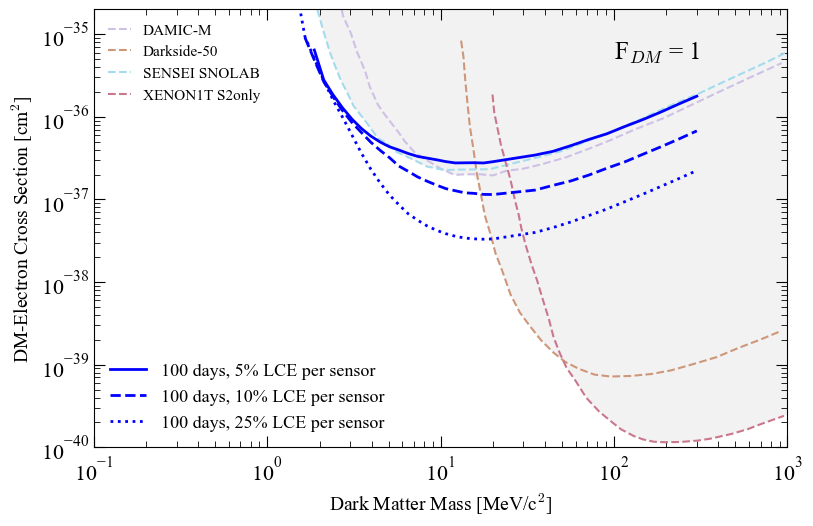

In [37]:
colors = ['blue','green','magenta']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(9.5,6))

plotexcludedmassive(ax, details=False)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper left',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='massive')

#ax.text(1.3e-2,1.5e-40,'HeRALD - {:0.1f} g \n2x2 device array \n {:0.0f} livedays'.format(mass_det*1e3,times[i]),fontsize=15)
#ax.text(1.25e0,2e-37,'SPICE\n5.3 g GaAs', fontsize=15)

leg_hands = []

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_100days_3fold_lce05/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='-', lw=2, label='100 days, 5% LCE per sensor')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_100days_3fold_lce10/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='--', lw=2, label='100 days, 10% LCE per sensor')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massive_100days_3fold_lce25/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls=':', lw=2, label='100 days, 25% LCE per sensor')
leg_hands.append(lh)

ax.text(1e2, 5e-36, r'F$_{DM}$ = 1', fontsize=18)

#x = 6.5e-2
#    if n<4:
#        y = sigs[0]
#    else: 
#        y = sigs[0]*0.75
#    ax.text(x,y,lab,fontsize=14,color=colors[j],alpha=0.95)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-40, 2e-35)
ax.set_xlim(1e-1, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower left', fontsize=13)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

/tmp/ipykernel_1167612/1832352967.py:14: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


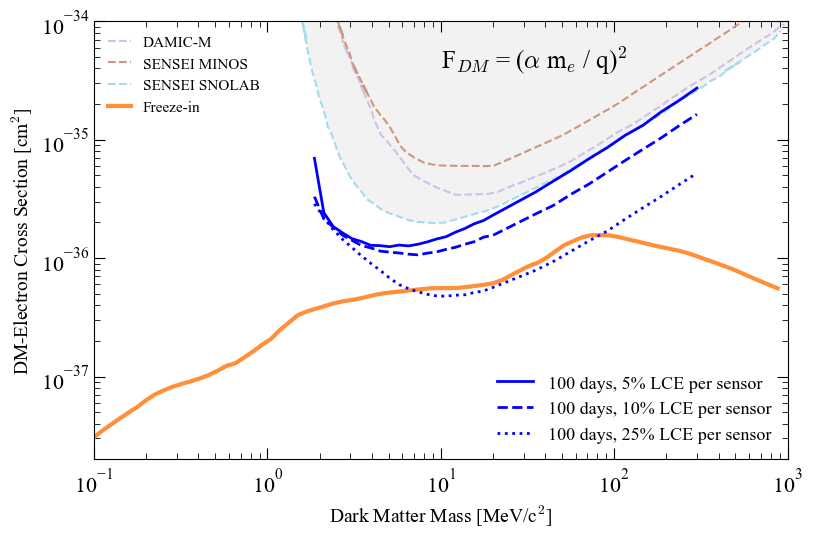

In [40]:
colors = ['blue','green','magenta']

lss = ['-','-','-']
    
fig, ax = plt.subplots(1, 1, figsize=(9.5,6))

plotexcludedmassless(ax, details=False)
#leg_params = {'loc':'upper right',
#              'frameon':True,
#              'handlelength':1.5,
#              'fontsize':9,
#              'ncol':3 }
leg_params = {'loc':'upper left',
              'frameon':False,
              'handlelength':1.5,
              'fontsize':11,
              'ncol':1 }
load_and_plot_existing(ax,leg=True,lw=1.5,leg_params=leg_params, ER_model='massless')

#ax.text(1.3e-2,1.5e-40,'HeRALD - {:0.1f} g \n2x2 device array \n {:0.0f} livedays'.format(mass_det*1e3,times[i]),fontsize=15)
#ax.text(1.25e0,2e-37,'SPICE\n5.3 g GaAs', fontsize=15)

leg_hands = []

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_100days_3fold_lce05/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='-', lw=2, label='100 days, 5% LCE per sensor')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_100days_3fold_lce10/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls='--', lw=2, label='100 days, 10% LCE per sensor')
leg_hands.append(lh)

m_limit, x_limit = np.loadtxt('gaas_for_review/results_gaas_oi_electron_massless_100days_3fold_lce25/HeRALD_FC_100d_3device_3fold_100mus.txt', unpack=True)
lh, = plt.plot(m_limit*1e3, x_limit, color='blue', ls=':', lw=2, label='100 days, 25% LCE per sensor')
leg_hands.append(lh)

ax.text(1e1, 4e-35, r'F$_{DM}$ = ($\alpha$ m$_e$ / q)$^2$', fontsize=18)

#x = 6.5e-2
#    if n<4:
#        y = sigs[0]
#    else: 
#        y = sigs[0]*0.75
#    ax.text(x,y,lab,fontsize=14,color=colors[j],alpha=0.95)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(2e-38, 1e-34)
ax.set_xlim(1e-1, 1e3)
ax.set_xlabel("Dark Matter Mass [MeV/c$^2$]", fontsize=14)
ax.set_ylabel("DM-Electron Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands, frameon=False, ncol=1, loc='lower right', fontsize=13)

#plt.savefig('./pretty_plots/herald_limits_{:0.1f}g_{:0.0f}d.png'.format(mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')

[[0.41708574 0.68063053 0.83823145 1.        ]
 [0.12710496 0.44018454 0.70749712 1.        ]
 [0.03137255 0.18823529 0.41960784 1.        ]]


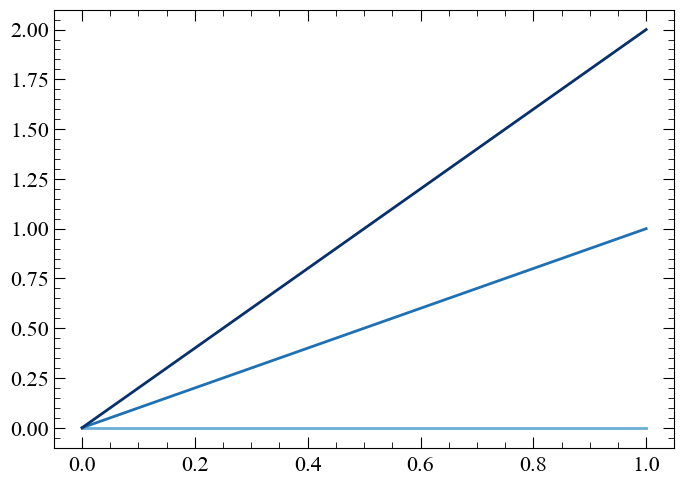

In [91]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

n_lines = 3
cmap = mpl.colormaps['Blues']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0.5, 1, n_lines))

print(colors)

fig, ax = plt.subplots()

for i, color in enumerate(colors):
    ax.plot([0, i], color=color)


In [ ]:
colors = ['blue','green','orange']

for i,t in enumerate(times):
    
    fig, ax = plt.subplots(figsize=(9, 6))
    #plt.plot(*(x1tmig.T),color=(0.,0.6,0.,0.7),ls='--',label='XENON1T Migdal')
    load_and_plot_existing(ax,leg=True,leg_params={'loc':'center left' } ) #,'bbox_to_anchor':(0.1,0.5)
    #fig.subplots_adjust(right=0.6)
    # Shrink current axis by 20%
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    
    leg_hands = []
    for j,n in enumerate(coinc):
        lab = '{:d}-fold coinc in {:0.0f}$\mu$s'.format(n,window/1e-6)
        #lh, = plt.plot(*(data['{:d}_{:d}'.format(i,j)].T), marker='.',ms=5,label=lab,color=colors[j])
        acc_mask = data['{:d}_{:d}'.format(i,j)][:,2]>acc_cut
        masses = data['{:d}_{:d}'.format(i,j)][:,0][acc_mask]
        sigs = data['{:d}_{:d}'.format(i,j)][:,1][acc_mask]
        lh, = plt.plot(masses,sigs, marker='.',ms=5,label=lab,color=colors[j])
        leg_hands.append(lh)

    ax.set_title('{:0.1f} g LHe; {:0.0f} days; {:0.1f} g-day'.format(mass_det*1e3,times[i],mass_det*1e3*times[i]))
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim(1e-40, 1e-34)
    ax.set_xlim(0.01, 5)
    ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
    ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)
    #ax.set_title("Estimated Sensitivity", fontsize=14)

    #ax.grid(lw=0.3,ls='--',color='grey')
    #ax.grid(which="minor", linestyle='dotted')
    ax.tick_params(which="both", direction="in", right=True, top=True)

    ax.legend(handles=leg_hands,loc='upper left',frameon=True,ncol=1,title='{:d} Devices'.format(n_devices)) #bbox_to_anchor=(0.5, 1.05)
    
    #bbox_extra_artists=(lgd,text)

In [ ]:
colors = ['blue','green','orange','red','pink','brown']

for j,n in enumerate(coinc):
    
    fig, ax = plt.subplots(figsize=(9, 6))
    #plt.plot(*(x1tmig.T),color=(0.,0.6,0.,0.7),ls='--',label='XENON1T Migdal')
    load_and_plot_existing(ax,leg=False,leg_params={'loc':'center left','bbox_to_anchor':(0.8,0.5) } )
    
    for i,t in enumerate(times):
        #print(coinc[j])
        #lab = '{:0.1f} g-day;\n{:d} devices, {:d}-fold coinc in {:0.0f}$\mu$s'.format(mass_det*1e3*t,n_devices,n,window/1e-6)
        lab = '{:0.1f} g-day'.format(mass_det*1e3*t)
        acc_mask = data['{:d}_{:d}'.format(i,j)][:,2]>acc_cut
        masses = data['{:d}_{:d}'.format(i,j)][:,0][acc_mask]
        sigs = data['{:d}_{:d}'.format(i,j)][:,1][acc_mask]
        plt.plot(masses,sigs, marker='.',ms=5,label=lab,color=colors[i])
    
    title = '{:d} devices, {:d}-fold coinc in {:0.0f}$\mu$s'.format(n_devices,n,window/1e-6)
    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim(1e-41, 1e-35)
    ax.set_xlim(0.01, 5)
    ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
    ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)
    #ax.set_title("Estimated Sensitivity", fontsize=14)

    ax.grid(lw=0.3,ls='--')
    ax.grid(which="minor", linestyle='dotted')
    ax.tick_params(which="both", direction="in", right=True, top=True)

    ax.legend(loc='lower left',frameon=True)

In [ ]:

# for fixed DM mass, plot limit vs runtime for each coinc level
m = 0.3 # GeV
m_idx, m = find_nearest(data['0_0'][:,0], m)
print(m)



fig, ax = plt.subplots()

leg_hands = []
for j,n in enumerate(coinc):
#for j,n in enumerate([4]):
    
    sigs = np.zeros(len(times))
    for i,t in enumerate(times):
        sigs[i] = data['{:d}_{:d}'.format(i,j)][m_idx,1]
    
    # find times to avoid FC jumps
    #slope_mask = np.diff(sigs)<0
    #print(slope_mask)
    #slope_mask = np.insert(slope_mask,0,1) #add True to make len equal
    #print(len(slope_mask))
    
    tmask = np.ones(len(times), dtype=bool)
    tmask[[5,14,24]] = False
    thetimes = times[tmask]
    thesigs = sigs[tmask]
    
    lab = '{:d}-fold'.format(n)
    lh, = plt.plot(thetimes,thesigs, label=lab,lw=2, color=colors[j])
    
    #plt.plot(times[slope_mask],sigs[slope_mask], marker='.',ms=7,label=lab,ls='')#,color=colors[j])
    
    leg_hands.append(lh)

ts = np.linspace(50,500,500)
#plt.plot(ts,3.5e-37*ts**(-0.5),ls='--',lw=0.5,color='black')
ax.text(345,2.1e-38,r'$\propto t^{-1/2}$',fontsize=15)

ts2 = np.linspace(1,500,500)
#plt.plot(ts2,4e-37*ts2**(-1),ls='--',lw=0.5,color='black')
ax.text(345,1.1e-39,r'$\propto t^{-1}$',fontsize=15)

#ax.set_title('{:0.1f} grams LHe'.format(mass_det*1e3))
ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_ylim(1e-40, 1e-36)
ax.set_xlim(times[0],400)
ax.set_xlabel("Livetime [days]", fontsize=14)
ax.set_ylabel(r'{:0.3f} GeV 90% CL Cross Section UL [cm$^2$]'.format(m), fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(handles=leg_hands,loc='upper right',frameon=False,ncol=1,
          title='Coincidence Level in {:0.0f} $\mu$s:'.format(window/1e-6),
          fontsize=14,
          title_fontsize=14
         ) #bbox_to_anchor=(0.5, 1.05)

#bbox_extra_artists=(lgd,text)

ax.text(13,2e-40,'HeRALD - {:0.1f} g \n'.format(mass_det*1e3)+r'$2\times2$'+' device array',fontsize=16)

plt.savefig('herald_{:0.3f}GeV_limit_vs_time_{:0.1f}g_{:0.0f}d.png'.format(m,mass_det*1e3,times[i]),facecolor='white',bbox_inches='tight')



In [ ]:
tmask = np.ones(len(times), dtype=bool)
tmask[[5,14,24]] = False
times[tmask]

In [ ]:
times

In [ ]:
for k, s in sigs:
    if k!=(len(sigs)-1):
        
    

print(np.diff( sigs ))
print( np.diff(sigs)<0 )

In [ ]:

fig, ax = plt.subplots(figsize=(9, 6))

x1tmig = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/XENON1T-Migdal.txt')
#cresst = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/CRESST.txt')

plt.plot(*(x1tmig.T),color=(0.,0.6,0.,0.7),ls='--',label='XENON1T Migdal')
#plt.plot(*(cresst.T),color=(0.8,0.1,0.1,0.7),label='CRESST')

for i,t in enumerate(exposures):
    for j,n in enumerate(coinc):
    
        #lab = 'HeRALD {:0.3f} kg-day;\n{:d} devices, {:d}-fold coinc in {:0.0f}$\mu$s'.format(SE.exposure,n_devices,coinc,window/1e-6)
        plt.plot(*(data['{:d}_{:d}'.format(i,j)].T), marker='.',ms=5)#,label=lab)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-41, 1e-35)
ax.set_xlim(0.01, 5)
ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)
#ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid(lw=0.3,ls='--')
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(loc='upper right',frameon=True)